In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
cifar10 = keras.datasets.cifar10
(x_train_full, y_train_full),(x_test, y_test) = cifar10.load_data()

In [3]:
x_train_full.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train_full[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

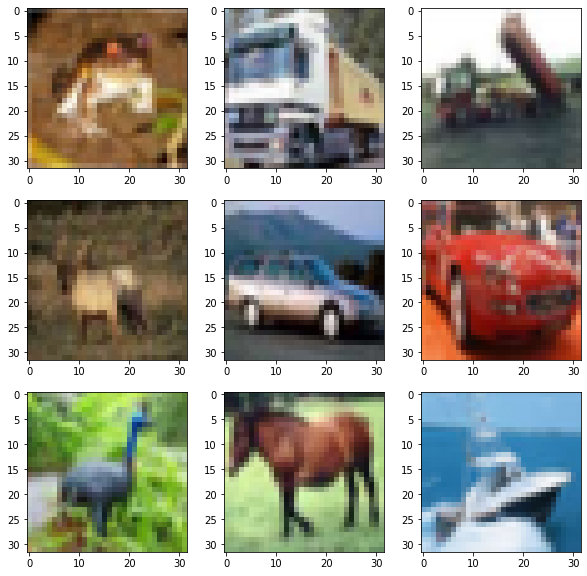

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(x_train_full[a], cmap = plt.get_cmap('gray'))
        a = a + 1
        
plt.show()        



In [7]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
class_names[y_train_full[8][0]]

'ship'

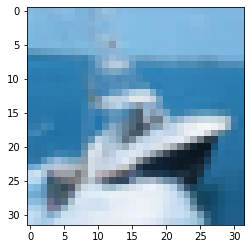

In [9]:
plt.imshow(x_train_full[8], cmap = plt.get_cmap('gray'))

In [10]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test/255

In [11]:
x_train[0]

array([[[0.23529412, 0.32156863, 0.21176471],
        [0.15686275, 0.26666667, 0.14117647],
        [0.20392157, 0.31764706, 0.20392157],
        ...,
        [0.20784314, 0.16862745, 0.19607843],
        [0.25882353, 0.21568627, 0.23921569],
        [0.28627451, 0.24313725, 0.26666667]],

       [[0.43921569, 0.44705882, 0.44705882],
        [0.22745098, 0.27843137, 0.21960784],
        [0.22745098, 0.31764706, 0.20784314],
        ...,
        [0.21176471, 0.18431373, 0.20784314],
        [0.2627451 , 0.22745098, 0.25490196],
        [0.28235294, 0.24313725, 0.27058824]],

       [[0.66666667, 0.63137255, 0.69803922],
        [0.46666667, 0.4627451 , 0.47058824],
        [0.31372549, 0.34901961, 0.29019608],
        ...,
        [0.21960784, 0.19607843, 0.21960784],
        [0.2745098 , 0.24705882, 0.2745098 ],
        [0.28235294, 0.25098039, 0.27843137]],

       ...,

       [[0.35686275, 0.44313725, 0.36862745],
        [0.23137255, 0.3254902 , 0.24313725],
        [0.17647059, 0

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.Dense(10, activation = "softmax")])




In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 10)                3

In [14]:
model.layers

In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [16]:
hsitory = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 7s 4ms/step - loss: 1.9653 - accuracy: 0.3118 - val_loss: 2.0740 - val_accuracy: 0.2494
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6725 - accuracy: 0.3993 - val_loss: 1.6523 - val_accuracy: 0.3962
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5738 - accuracy: 0.4352 - val_loss: 1.6816 - val_accuracy: 0.3980
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5082 - accuracy: 0.4575 - val_loss: 1.9427 - val_accuracy: 0.3342
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4579 - accuracy: 0.4765 - val_loss: 1.6792 - val_accuracy: 0.4088
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4163 - accuracy: 0.4912 - val_loss: 1.5403 - val_accuracy: 0.4448
Epoch 7/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3824 - accuracy: 0.5041 - val_loss: 1.6221 - val_accuracy:

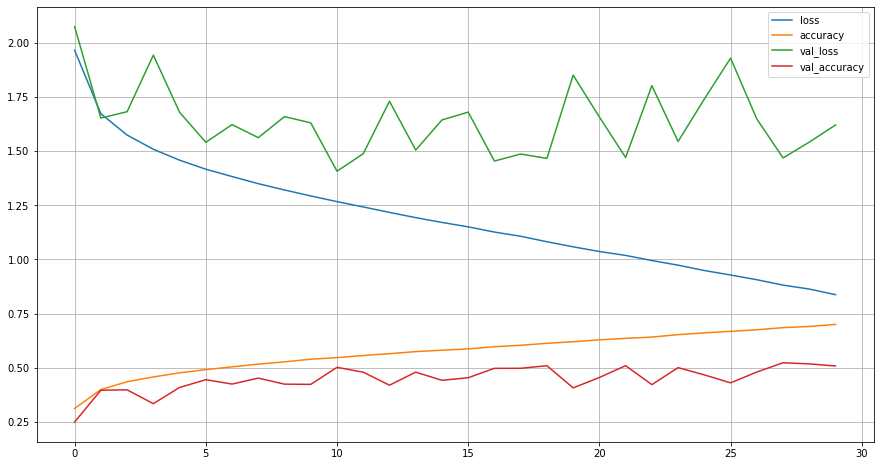

In [17]:
import pandas as pd

pd.DataFrame(hsitory.history).plot(figsize=(15,8))
plt.gca()
plt.grid(True)
plt.show()

As from the above graph, our model seems to be overfitting as the validation accuracy is not increasing and also we are having spikes in the validation loss. so we will use alpha dropout layer which normalizes the output even if we are done with the inputs

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32,32,3]),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(300, kernel_initializer = 'lecun_normal', activation = 'selu'),
    keras.layers.AlphaDropout(rate=0.1),
    keras.layers.Dense(10, activation = "softmax")])




In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [20]:
hsitory = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid), batch_size = 32)

Epoch 1/30
1407/1407 [==============================] - 10s 6ms/step - loss: 2.2878 - accuracy: 0.1785 - val_loss: 2.2137 - val_accuracy: 0.1994
Epoch 2/30
1407/1407 [==============================] - 8s 6ms/step - loss: 2.0632 - accuracy: 0.2350 - val_loss: 2.1952 - val_accuracy: 0.2418
Epoch 3/30
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0087 - accuracy: 0.2579 - val_loss: 2.0654 - val_accuracy: 0.2860
Epoch 4/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9651 - accuracy: 0.2815 - val_loss: 2.0211 - val_accuracy: 0.3162
Epoch 5/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9397 - accuracy: 0.2952 - val_loss: 1.9047 - val_accuracy: 0.3438
Epoch 6/30
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9168 - accuracy: 0.2999 - val_loss: 2.0115 - val_accuracy: 0.3312
Epoch 7/30
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8968 - accuracy: 0.3079 - val_loss: 2.1555 - val_accurac

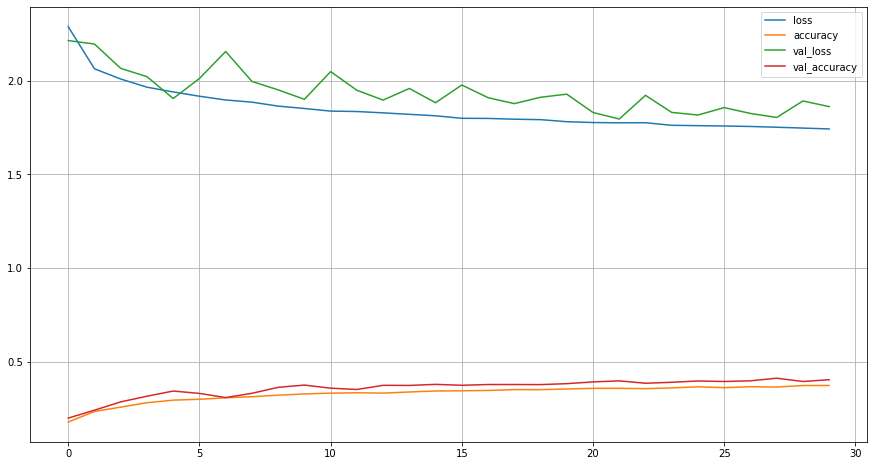

In [21]:
import pandas as pd

pd.DataFrame(hsitory.history).plot(figsize=(15,8))
plt.gca()
plt.grid(True)
plt.show()

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8467 - accuracy: 0.4124


[1.8466546535491943, 0.4124000072479248]

If we use regularization our performance is lowered as you see above but can be fixed by training more.

Now if we try the exponential technique to check whether the performance gets higher or not?

In [23]:
def exponential_decay(epoch):
    return 0.01*0.1**(epoch/10)

exponential_decay_fn = exponential_decay
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [24]:
hsitory = model.fit(x_train, y_train, epochs = 60, validation_data = (x_valid, y_valid), batch_size = 32, callbacks = [lr_scheduler])

Epoch 1/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7387 - accuracy: 0.3726 - val_loss: 1.8570 - val_accuracy: 0.4016 - lr: 0.0100
Epoch 2/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7289 - accuracy: 0.3749 - val_loss: 1.8193 - val_accuracy: 0.4092 - lr: 0.0079
Epoch 3/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7194 - accuracy: 0.3798 - val_loss: 1.7672 - val_accuracy: 0.4270 - lr: 0.0063
Epoch 4/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7152 - accuracy: 0.3801 - val_loss: 1.7675 - val_accuracy: 0.4154 - lr: 0.0050
Epoch 5/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7112 - accuracy: 0.3820 - val_loss: 1.7606 - val_accuracy: 0.4190 - lr: 0.0040
Epoch 6/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7059 - accuracy: 0.3868 - val_loss: 1.7340 - val_accuracy: 0.4232 - lr: 0.0032
Epoch 7/60
1407/1407 [==============================] - 9s

Epoch 52/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6858 - accuracy: 0.3915 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 7.9433e-08
Epoch 53/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6885 - accuracy: 0.3915 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 6.3096e-08
Epoch 54/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6839 - accuracy: 0.3909 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 5.0119e-08
Epoch 55/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6894 - accuracy: 0.3902 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 3.9811e-08
Epoch 56/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6891 - accuracy: 0.3891 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 3.1623e-08
Epoch 57/60
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6894 - accuracy: 0.3900 - val_loss: 1.7502 - val_accuracy: 0.4238 - lr: 2.5119e-08
Epoch 58/60
1407/1407 [=====

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7530 - accuracy: 0.4303


[1.7530208826065063, 0.4302999973297119]

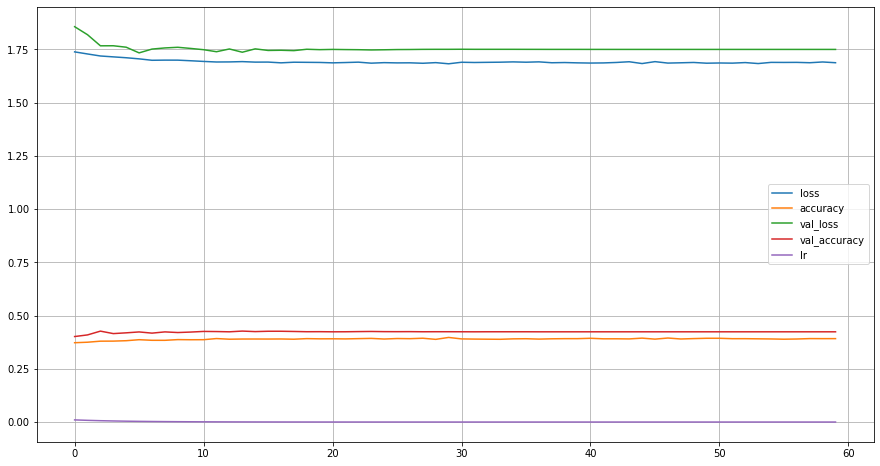

In [26]:
import pandas as pd

pd.DataFrame(hsitory.history).plot(figsize=(15,8))
plt.gca()
plt.grid(True)
plt.show()